# Final Project Submission

Please fill out:
* Student name: Lauren Petrillo
* Student pace: Flex
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Introduction

## Objective

I was hired by West Seattle Realty (a local real estate agency) to provide insights to better their speciality in helping buyers and sellers navigate the King County residential home market.

Link to local agency: https://westseattlerealty.com/west-seattle-realty

## Questions to Consider for Modeling

1. What features in a house are linearly related to price?
2. What are the most important factors when determining price of a house?
3. Does location (zipcode/lat/long) have an effect on price?

## Importing Libraries

In [572]:
import pandas as pd
import numpy as np
from numpy.random import randn
from pandas import DataFrame, Series
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', 0)
plt.style.use('seaborn')

## Load Data

In [573]:
df = pd.read_csv('data/kc_house_data.csv')

In [574]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## King County Data Set Info

### Column Descriptions

**id** - unique identified for a house
**dateDate** - house was sold
pricePrice - is prediction target
bedroomsNumber - of Bedrooms/House
bathroomsNumber - of bathrooms/bedrooms
sqft_livingsquare - footage of the home
sqft_lotsquare - footage of the lot
floorsTotal - floors (levels) in house
waterfront - House which has a view to a waterfront
view - Has been viewed
condition - How good the condition is ( Overall )
grade - overall grade given to the housing unit, based on King County grading system
sqft_above - square footage of house apart from basement
sqft_basement - square footage of the basement
yr_built - Built Year
yr_renovated - Year when house was renovated
zipcode - zip
lat - Latitude coordinate
long - Longitude coordinate
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

### Building Condition

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

### Building Grade

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 = Falls short of minimum building standards. Normally cabin or inferior structure.

4 = Generally older, low quality construction. Does not meet code.

5 = Low construction costs and workmanship. Small, simple design.

6 = Lowest grade currently meeting building code. Low quality materials and simple designs.

7 = Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 = Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 = Better architectural design with extra interior and exterior design and quality.

10 = Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 = Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 = Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 = Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

Received information on building grade and condition using this source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

More information can be found regarding the demographics/background info of King County here: https://kingcounty.gov/depts/executive/performance-strategy-budget/regional-planning/Demographics.aspx

# Data Engineering

## Data Cleaning/Exploration

In [575]:
df.info()
#need to change sqft_basement and date from objects to ints
#waterfront, view, and yr_renovated have missing values
#look through data to see if any sets need to be dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [576]:
#detect any missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [577]:
#replace missing values for waterfront, yr_renovated, and view  

fill_waterfront = ['waterfront']
fill_yr_renovated = ['yr_renovated']
fill_view = ['view']

for replace in fill_waterfront:
    missing = df[replace].mode()[0]
    df[replace].fillna(missing, inplace = True)
    
for replace in fill_yr_renovated:
    missing = df[replace].mode()[0]
    df[replace].fillna(missing, inplace = True)
    
for replace in fill_view:
    missing = df[replace].mode()[0]
    df[replace].fillna(missing, inplace = True)

In [578]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [579]:
#split up the month, day, and year from 'date'
df[['month', 'day', 'year']] = df['date'].str.split('/', expand=True)

In [580]:
df['month']

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: month, Length: 21597, dtype: object

In [581]:
#drop the date, day, and year. Only keeping the month
df = df.drop(['date','day', 'year'], axis=1)

In [582]:
#create new feature for month sold 
df['month_sold'] = df['month'].astype(str).astype(int)

In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [584]:
#first fill the '?' value with '0.0' and then convert sqft_basement from a string to a float
df['sqft_basement'] = df['sqft_basement'].replace(to_replace = '?', value = 0.0)
df['sqft_basement'] = df['sqft_basement'].astype(str).astype(float)

In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

**Price**

In [586]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

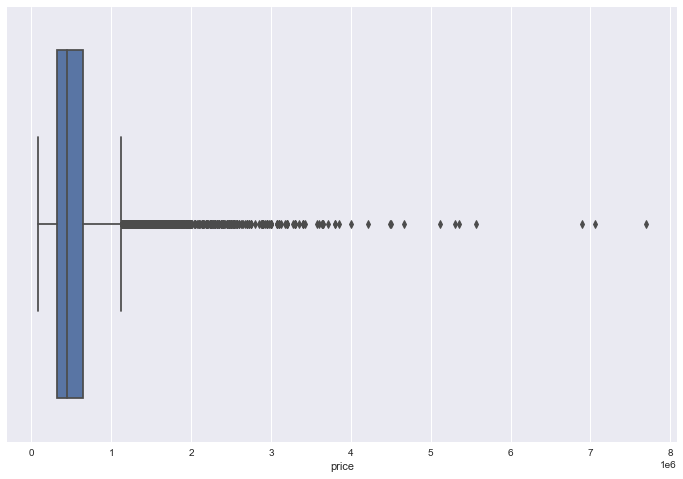

In [587]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='price', data=df, ax=ax)

In [588]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e10:
        s = '${:1.1f}B'.format(x*1e-10)
    elif x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-2)
    return s

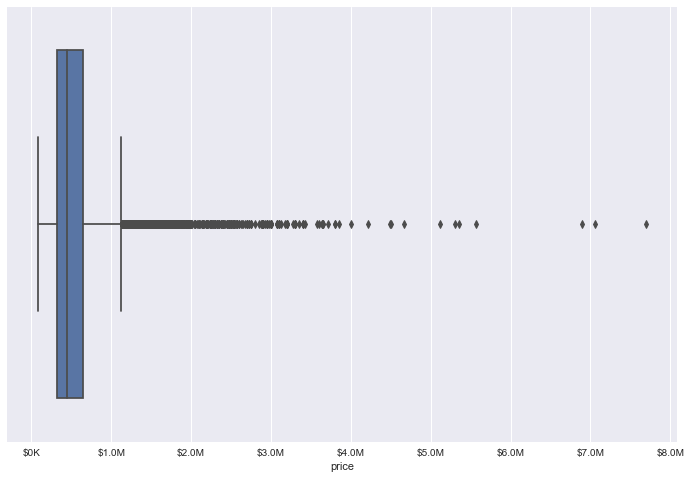

In [589]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='price', data=df, ax=ax)
ax.xaxis.set_major_formatter(currency)

In [590]:
df = df.loc[df['price'] < 6000000]

In [591]:
df['price'].min()

78000.0

**Bedrooms**

In [592]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1600
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [593]:
df = df.loc[df['bedrooms'] < 10]

**Bathrooms**

In [594]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1929
1.50    1445
2.75    1185
3.00     751
3.50     731
3.25     589
3.75     155
4.00     136
4.50      99
4.25      79
0.75      71
4.75      23
5.00      21
5.25      12
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.25       2
6.50       2
6.75       2
8.00       1
7.50       1
Name: bathrooms, dtype: int64

<AxesSubplot:xlabel='bathrooms'>

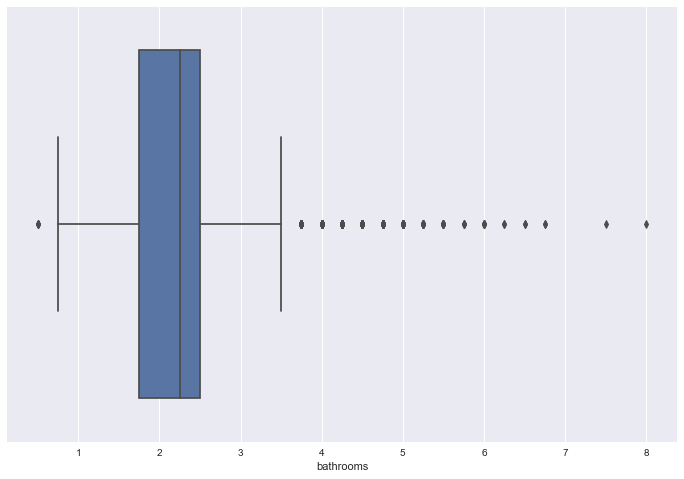

In [595]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='bathrooms', data=df, ax=ax)

In [596]:
df = df.loc[df['bathrooms'] < 4]

**Sqft_living**

<AxesSubplot:xlabel='sqft_living'>

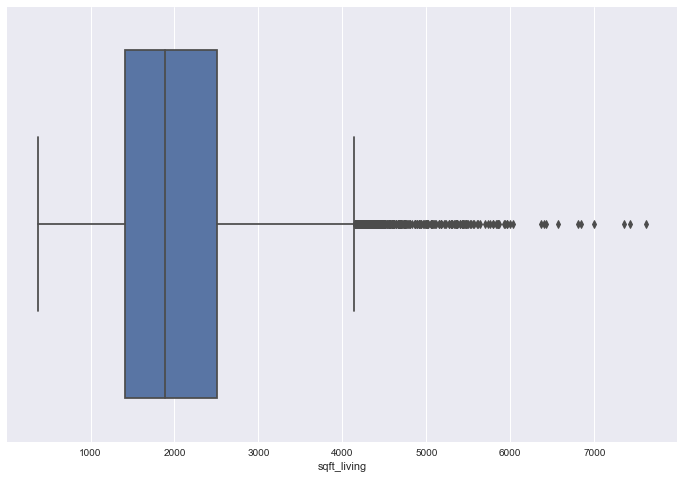

In [597]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='sqft_living', data=df, ax=ax)

In [598]:
df = df.loc[df['sqft_living'] < 6000]

**Sqft_lot**

<AxesSubplot:xlabel='sqft_lot'>

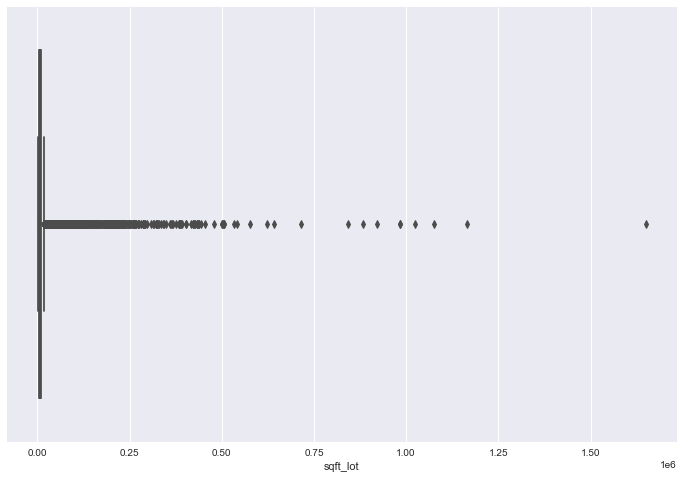

In [599]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='sqft_lot', data=df, ax=ax)

In [600]:
def number(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e10:
        s = '{:1.1f}B'.format(x*1e-10)
    elif x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-2)
    return s

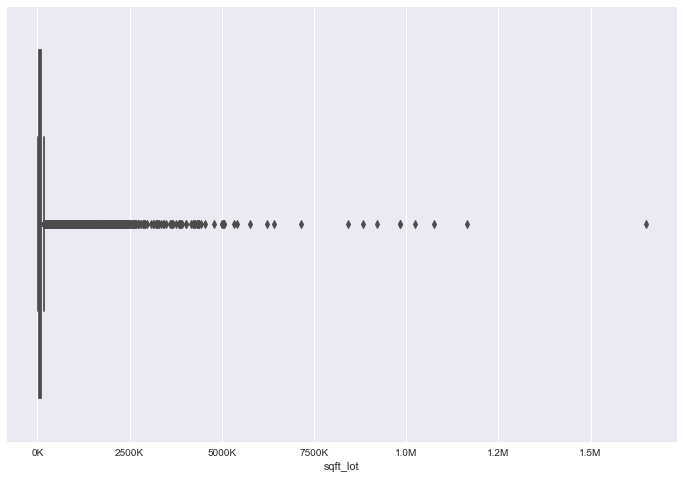

In [601]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='sqft_lot', data=df, ax=ax)
ax.xaxis.set_major_formatter(number)

In [602]:
df = df.loc[df['sqft_lot'] < 750000]

**Floors**

In [603]:
df['floors'].value_counts()

1.0    10629
2.0     7908
1.5     1898
3.0      588
2.5      142
3.5        6
Name: floors, dtype: int64

In [604]:
df = df.loc[df['floors'] < 3]

**Waterfront**

In [605]:
df['waterfront'].value_counts()

NO     20460
YES      117
Name: waterfront, dtype: int64

In [606]:
df['waterfront'] = df['waterfront'].map({'YES': 1, 'NO': 0})

**View**

In [607]:
df['view'].value_counts()

NONE         18663
AVERAGE        887
GOOD           448
FAIR           313
EXCELLENT      266
Name: view, dtype: int64

**Condition**

In [608]:
df['condition'].value_counts()

Average      13103
Good          5607
Very Good     1669
Fair           169
Poor            29
Name: condition, dtype: int64

**Grade**

In [609]:
df['grade'].value_counts()

7 Average        8840
8 Good           5630
9 Better         2490
6 Low Average    2037
10 Very Good      995
11 Excellent      272
5 Fair            241
12 Luxury          42
4 Low              27
13 Mansion          2
3 Poor              1
Name: grade, dtype: int64

**Sqft_above**

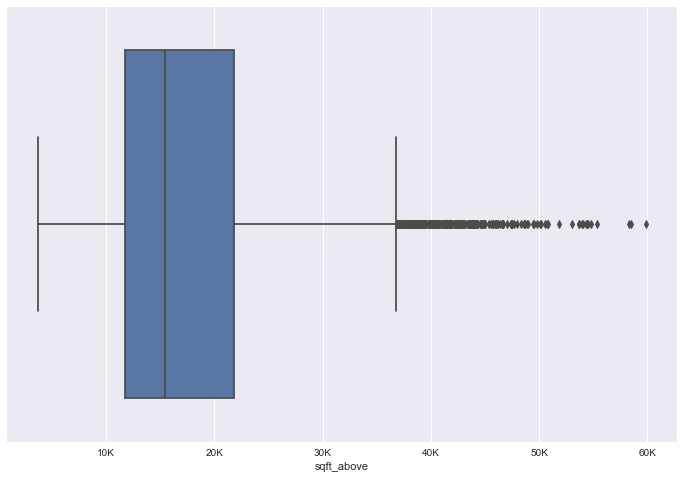

In [610]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='sqft_above', data=df, ax=ax)
ax.xaxis.set_major_formatter(number)

**Sqft_basement**

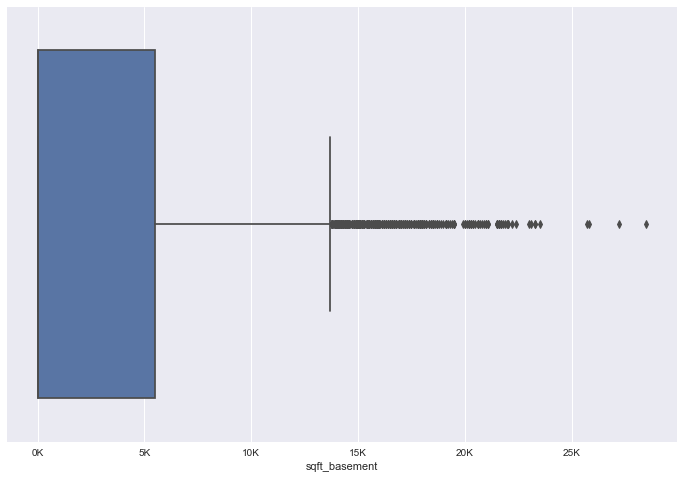

In [611]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='sqft_basement', data=df, ax=ax)
ax.xaxis.set_major_formatter(number)

In [612]:
#create has basement category
df['has_basement'] = df['sqft_basement'].astype('bool').astype('int')

**Yr_built**

In [613]:
df['yr_built'].value_counts()

2014    462
1977    414
2005    396
2003    394
2004    388
       ... 
1933     27
1902     27
2015     25
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [614]:
#create column for age of house
df['house_age'] = 2022 - df['yr_built']

**Yr_renovated**

In [615]:
df['yr_renovated'].value_counts()

0.0       19869
2014.0       70
2007.0       29
2013.0       29
2003.0       28
          ...  
1950.0        1
1953.0        1
1934.0        1
1948.0        1
1971.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [616]:
#create renovated category
df['renovated'] = df['yr_renovated'].astype('bool').astype('int')

**Zipcode**

In [617]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98003, 98198, 98146, 98038,
       98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133, 98040,
       98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001,
       98056, 98166, 98053, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98116, 98010, 98118,
       98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177, 98065,
       98029, 98006, 98109, 98022, 98075, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

**Sqft_living15**

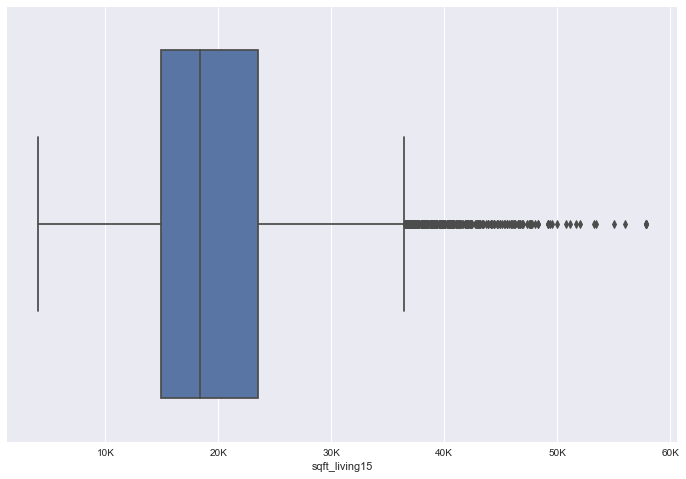

In [618]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='sqft_living15', data=df, ax=ax)
ax.xaxis.set_major_formatter(number)

**Sqft_lot15**

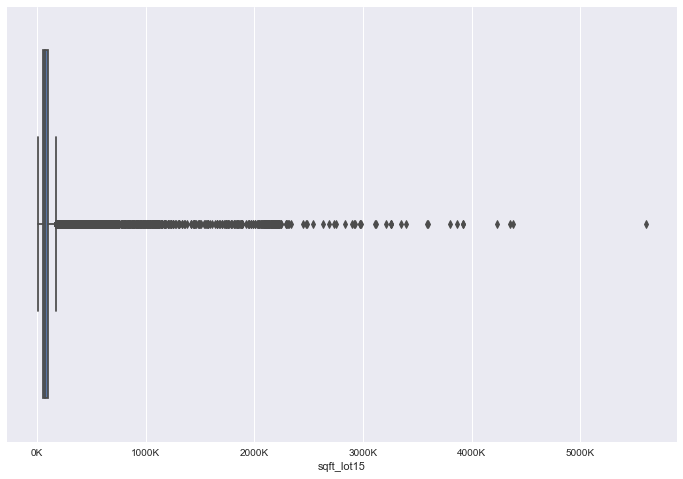

In [619]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='sqft_lot15', data=df, ax=ax)
ax.xaxis.set_major_formatter(number)

In [620]:
df = df.loc[df['sqft_lot15'] < 50000]

In [621]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19936 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19936 non-null  int64  
 1   price          19936 non-null  float64
 2   bedrooms       19936 non-null  int64  
 3   bathrooms      19936 non-null  float64
 4   sqft_living    19936 non-null  int64  
 5   sqft_lot       19936 non-null  int64  
 6   floors         19936 non-null  float64
 7   waterfront     19936 non-null  int64  
 8   view           19936 non-null  object 
 9   condition      19936 non-null  object 
 10  grade          19936 non-null  object 
 11  sqft_above     19936 non-null  int64  
 12  sqft_basement  19936 non-null  float64
 13  yr_built       19936 non-null  int64  
 14  yr_renovated   19936 non-null  float64
 15  zipcode        19936 non-null  int64  
 16  lat            19936 non-null  float64
 17  long           19936 non-null  float64
 18  sqft_l

In [622]:
#Dropping columns I won't use
df.drop(columns=['id','month','lat','long', 'yr_renovated',
                 'yr_built', 'sqft_basement'],inplace=True)

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19936 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19936 non-null  float64
 1   bedrooms       19936 non-null  int64  
 2   bathrooms      19936 non-null  float64
 3   sqft_living    19936 non-null  int64  
 4   sqft_lot       19936 non-null  int64  
 5   floors         19936 non-null  float64
 6   waterfront     19936 non-null  int64  
 7   view           19936 non-null  object 
 8   condition      19936 non-null  object 
 9   grade          19936 non-null  object 
 10  sqft_above     19936 non-null  int64  
 11  zipcode        19936 non-null  int64  
 12  sqft_living15  19936 non-null  int64  
 13  sqft_lot15     19936 non-null  int64  
 14  month_sold     19936 non-null  int32  
 15  has_basement   19936 non-null  int32  
 16  house_age      19936 non-null  int64  
 17  renovated      19936 non-null  int32  
dtypes: flo

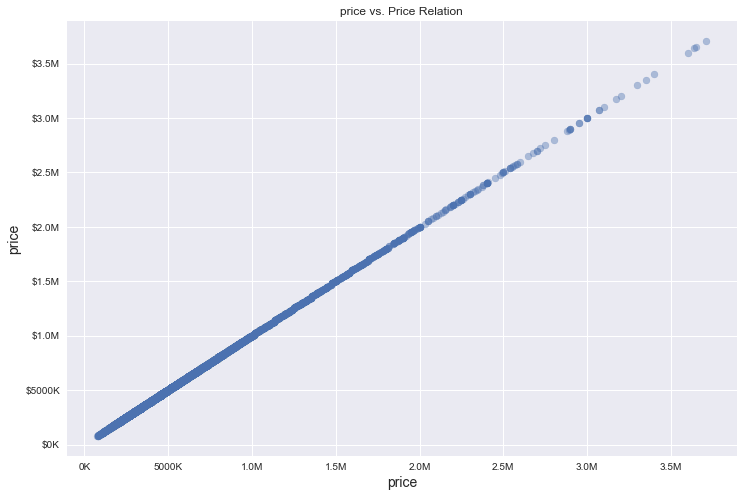

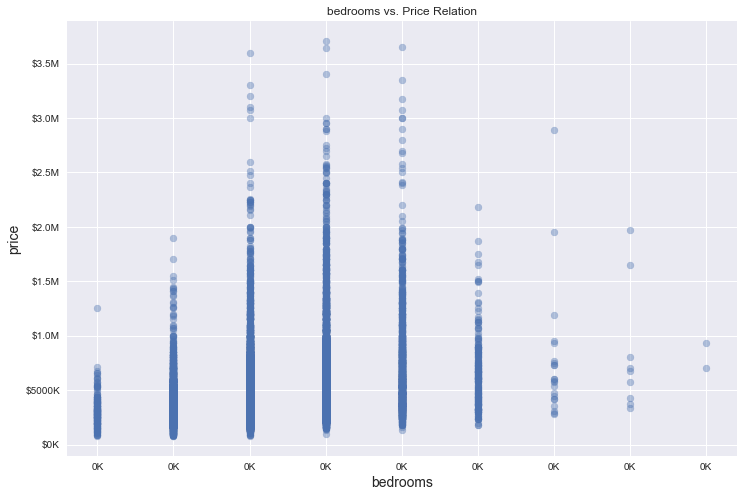

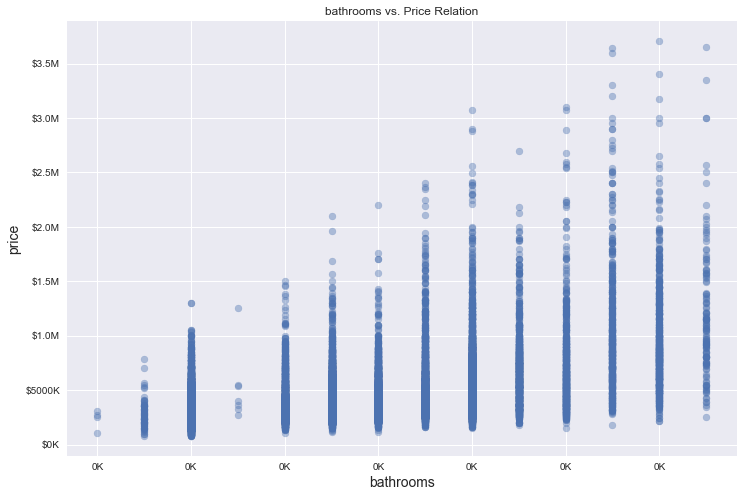

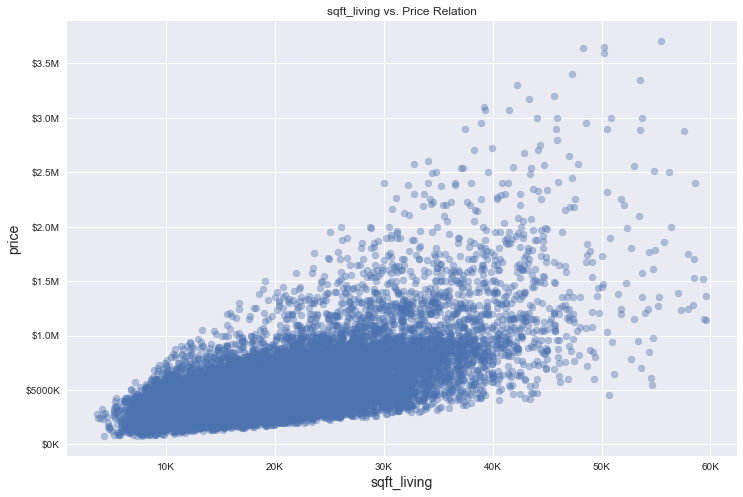

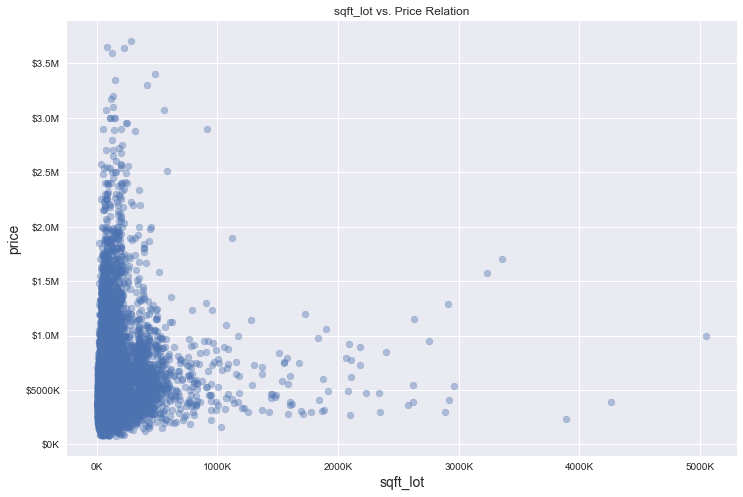

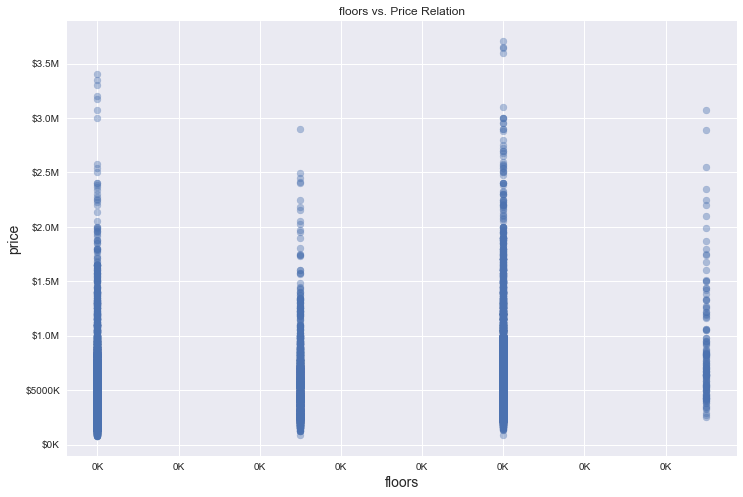

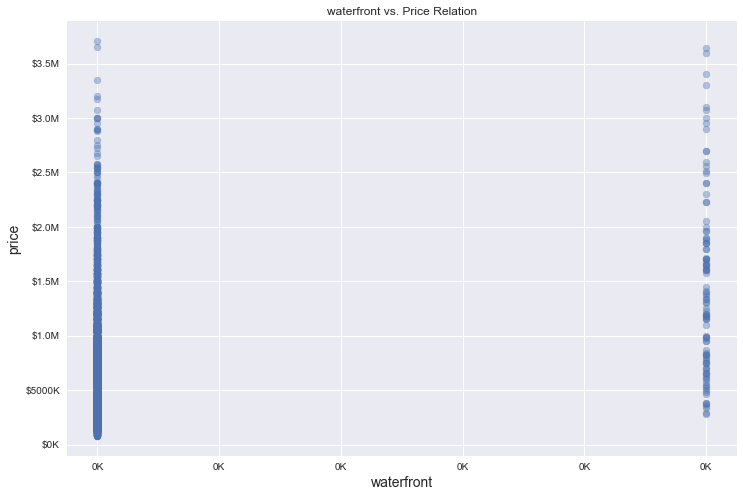

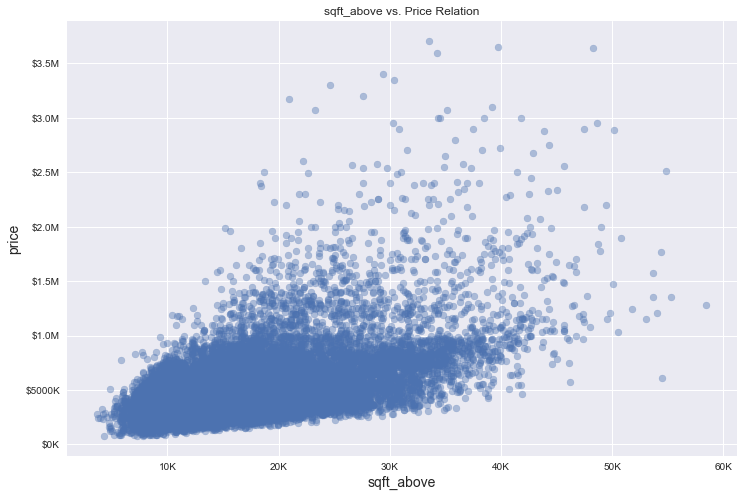

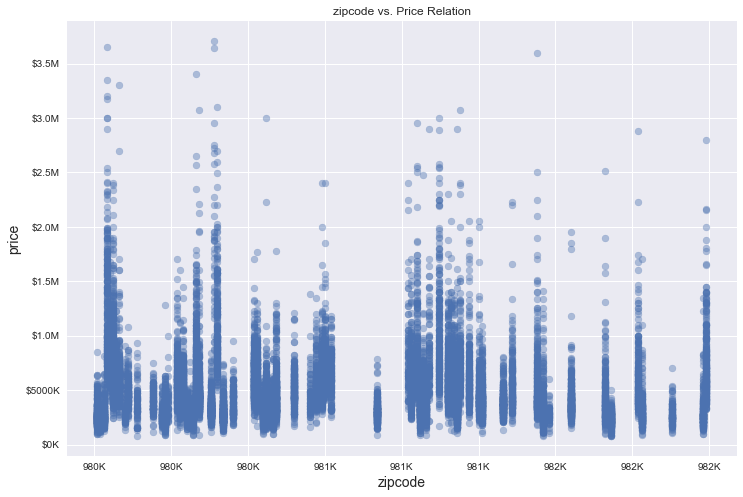

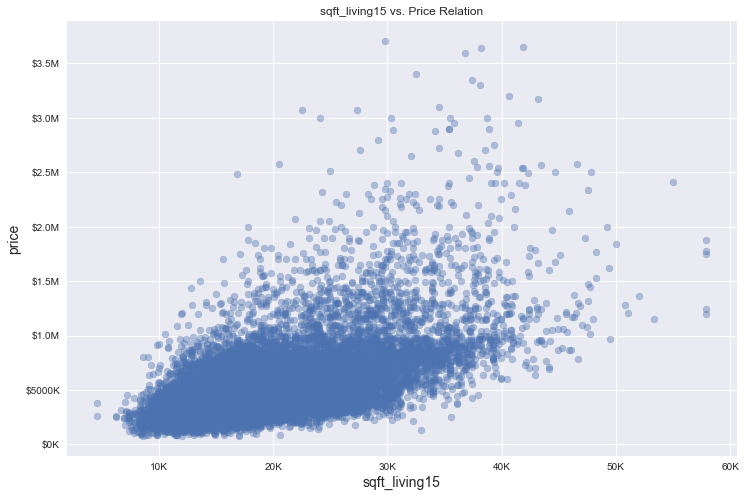

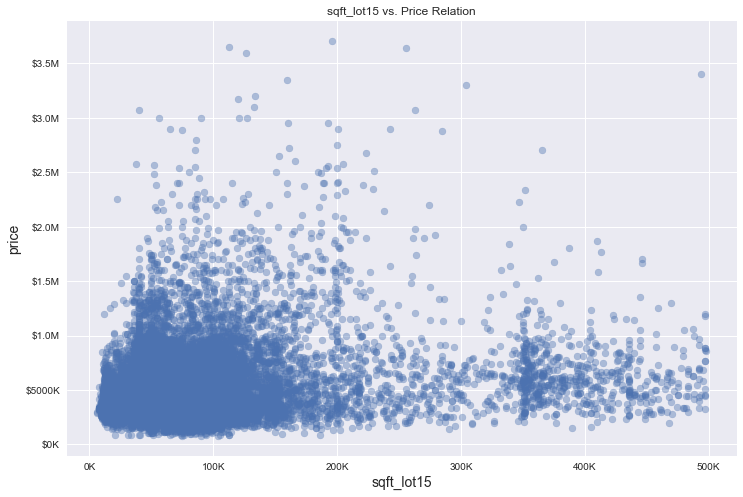

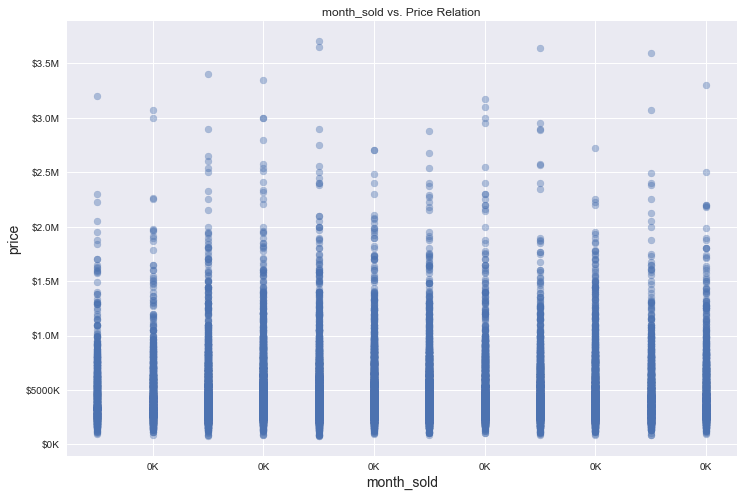

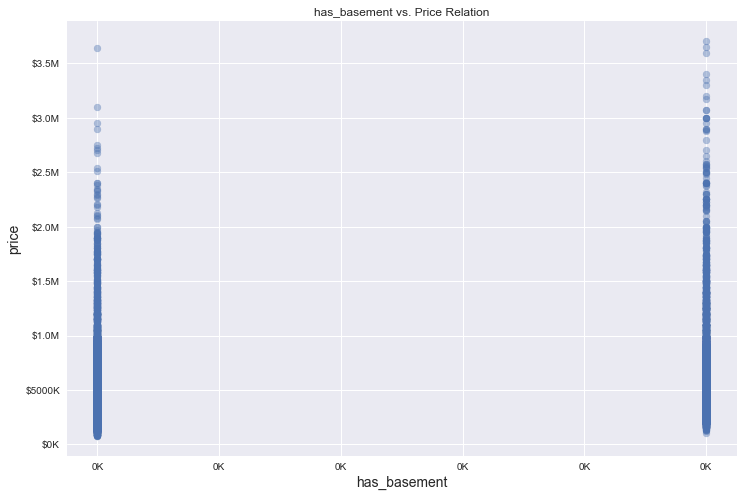

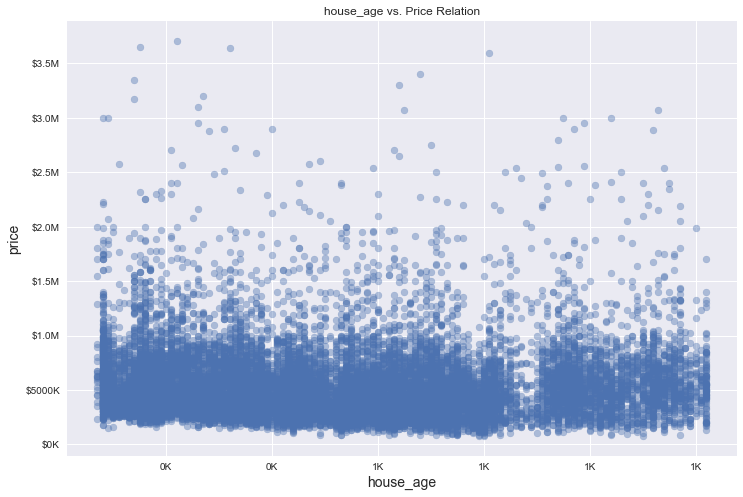

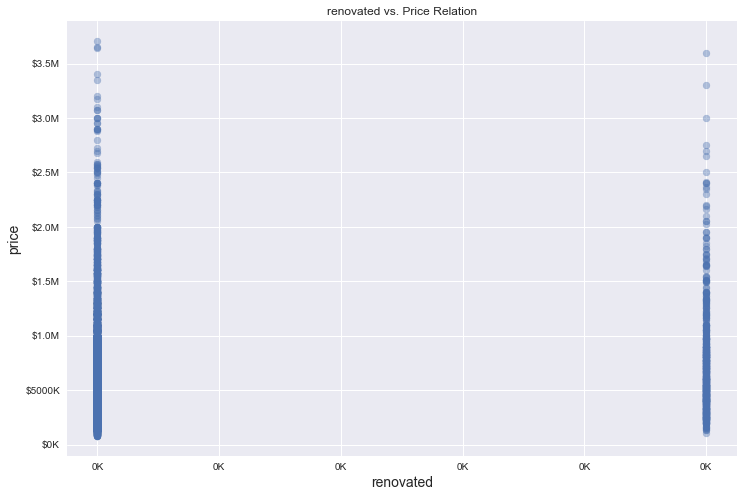

In [624]:
#getting all numerical columns in df
for col in df.describe().columns:
    fig , ax = plt.subplots(figsize=(12,8))
    ax.scatter(df[col], df.price ,alpha=.4)
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('price',fontsize=14)
    ax.set_title(f'{col} vs. Price Relation')
    ax.yaxis.set_major_formatter(currency)
    ax.xaxis.set_major_formatter(number)
    plt.show()

In [625]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19936 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19936 non-null  float64
 1   bedrooms       19936 non-null  int64  
 2   bathrooms      19936 non-null  float64
 3   sqft_living    19936 non-null  int64  
 4   sqft_lot       19936 non-null  int64  
 5   floors         19936 non-null  float64
 6   waterfront     19936 non-null  int64  
 7   view           19936 non-null  object 
 8   condition      19936 non-null  object 
 9   grade          19936 non-null  object 
 10  sqft_above     19936 non-null  int64  
 11  zipcode        19936 non-null  int64  
 12  sqft_living15  19936 non-null  int64  
 13  sqft_lot15     19936 non-null  int64  
 14  month_sold     19936 non-null  int32  
 15  has_basement   19936 non-null  int32  
 16  house_age      19936 non-null  int64  
 17  renovated      19936 non-null  int32  
dtypes: flo

In [626]:
#change zipcode from int to category to OHE
df['zipcode']=df['zipcode'].astype('category')

**Multicollinearity**

In [627]:
x = df.drop('price',axis=1)

In [628]:
# # Creating VIF Dictionary.
def create_vif_dct(dataframe, const_col_name='const'):
    
    if const_col_name not in dataframe.columns:
        dataframe = sm.add_constant(dataframe)
        
    # Dummy-checking.
    df = dataframe.select_dtypes('number')
    if df.shape != dataframe.shape:
        warnings.warn('\n\nThere are non-numerical columns trying to be passed!\nThese have automatically been removed.\n')
    if df.isna().sum().any():
        raise ValueError('There may not be any missing values in the dataframe!')
        
    # Creating VIF Dictionary.
    vif_dct = {}

    # Loop through each row and set the variable name to the VIF. 
    for i in range(len(df.columns)):
        vif = variance_inflation_factor(df.values, i)
        v = df.columns[i]
        vif_dct[v] = vif

    return vif_dct

In [629]:
create_vif_dct(df)

{'const': 55.022724198167936,
 'price': 2.2985408828428797,
 'bedrooms': 1.6802078637693854,
 'bathrooms': 3.2383158695835093,
 'sqft_living': 14.688164021777045,
 'sqft_lot': 1.6277215158469391,
 'floors': 2.230002774313753,
 'waterfront': 1.078430912077137,
 'sqft_above': 14.714453503122858,
 'sqft_living15': 2.8236325399180373,
 'sqft_lot15': 1.8589869591929093,
 'month_sold': 1.0026896051947436,
 'has_basement': 3.3491766847912894,
 'house_age': 1.9451900845210486,
 'renovated': 1.086912571340142}

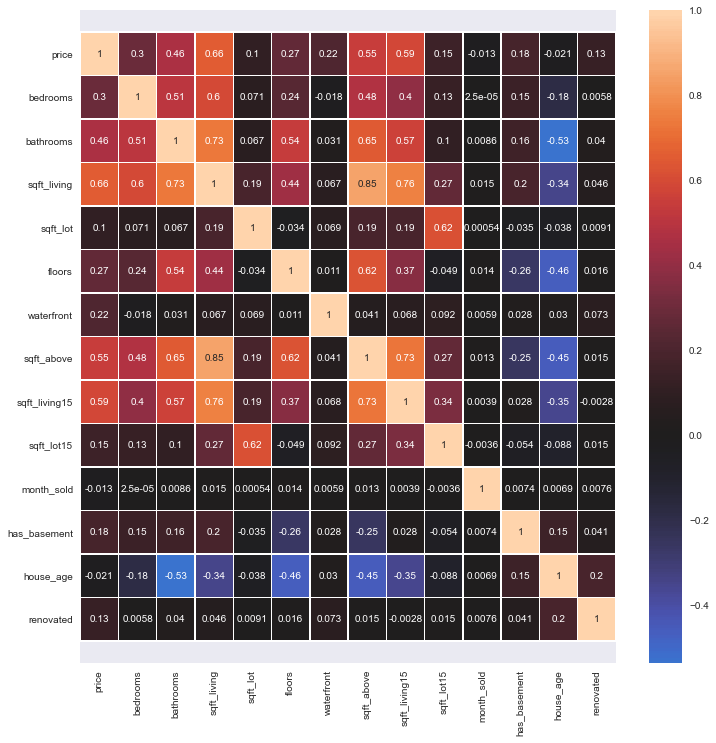

In [630]:
#check for multicollinearity visually
plt.figure(figsize=(12, 12))
ax = sns.heatmap(df.corr(), center=0, linewidths=.5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [631]:
#Dropping most multicollinearity columns.
df.drop(columns=['sqft_above','bathrooms', 'house_age', 'month_sold'],inplace=True)

## Train Test Split

In [632]:
y = df['price']
X= df.drop('price',axis=1)

In [633]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state = 200)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((15948, 13), (3988, 13), (15948,), (3988,))

**OHE**

In [634]:
#splitting up the continous vs. categorical data
df_continuous = ['sqft_living', 'sqft_above' 'sqft_living15', 'sqft_lot', 'sqft_lot15']

df_categorical = ['waterfront', 'bedrooms', 'grade', 'renovated', 'view', 'zipcode', 'has_basement', 'condition', 'floors']

In [635]:
X_train_cat=pd.DataFrame()
for i in df_categorical:
    X_train_cat[i]=X_train[i].astype('category')
    
X_test_cat=pd.DataFrame()
for i in df_categorical:
    X_test_cat[i]=X_test[i].astype('category')

In [636]:
for i in df_categorical:
    dummies=pd.get_dummies(X_train_cat[i],prefix=i, drop_first=True)
    X_train_cat=X_train_cat.join(dummies)
    X_train_cat.drop([i], axis=1, inplace=True)
    
    
for i in df_categorical:
    dummies=pd.get_dummies(X_test_cat[i],prefix=i, drop_first=True)
    X_test_cat=X_test_cat.join(dummies)
    X_test_cat.drop([i], axis=1, inplace=True)

In [637]:
cont_features =['sqft_living','sqft_lot','sqft_living15','sqft_lot15']

In [638]:
X_train_cont = X_train[cont_features]
X_test_cont = X_test[cont_features]

In [639]:
linreg = LinearRegression()
linreg.fit(X_train_cont,y_train)

LinearRegression()

In [640]:
linreg.score(X_train_cont,y_train)

0.45462587938469934

**Scaling Data**

In [641]:
#ss = StandardScaler()
#X_train_cont_scaled = ss.fit_transform(X_train_cont)
#X_test_cont_scaled = ss.transform(X_test_cont)

In [642]:
#linreg_norm = LinearRegression()
#linreg_norm.fit(X_train_cont_scaled,y_train)

In [643]:
#linreg_norm.score(X_train_cont_scaled,y_train)

In [644]:
#print('Train Continuous MSE:',mean_squared_error(y_train, linreg_norm.predict(X_train_cont_scaled)))

In [645]:
X_train_cont

,sqft_living,sqft_lot,sqft_living15,sqft_lot15
1153,700,3000,1560,4500
17534,2240,8162,1550,8163
17123,3230,7800,3030,6600
9503,5844,10766,3413,10766
12355,2390,8102,2310,8606
...,...,...,...,...
9693,1210,7140,1150,7376
14988,2970,11985,2990,12049
840,1660,10725,1340,9023
13822,1330,7125,1570,7350


In [646]:
X_train_cont = pd.DataFrame(X_train_cont , columns=X_train_cont.columns)
X_test_cont = pd.DataFrame(X_test_cont , columns=X_test_cont.columns)

In [647]:
X_train_cont

,sqft_living,sqft_lot,sqft_living15,sqft_lot15
1153,700,3000,1560,4500
17534,2240,8162,1550,8163
17123,3230,7800,3030,6600
9503,5844,10766,3413,10766
12355,2390,8102,2310,8606
...,...,...,...,...
9693,1210,7140,1150,7376
14988,2970,11985,2990,12049
840,1660,10725,1340,9023
13822,1330,7125,1570,7350


In [648]:
#X_train_cat.reset_index(inplace=True)
#X_test_cat.reset_index(inplace=True)

In [649]:
X_train_cat

,waterfront_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,renovated_1,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,...,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,condition_Fair,condition_Good,condition_Poor,condition_Very Good,floors_1.5,floors_2.0,floors_2.5
1153,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
17534,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
17123,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
9503,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12355,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14988,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
840,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
13822,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [650]:
X_train_all = pd.concat([X_train_cont, X_train_cat], axis=1)
X_test_all = pd.concat([X_test_cont, X_test_cat], axis=1)

In [651]:
#not creating a new column by resetting index
X_train_all.reset_index(inplace=True)
X_test_all.reset_index(inplace=True)

In [652]:
X_train_all

,index,sqft_living,sqft_lot,sqft_living15,sqft_lot15,waterfront_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,renovated_1,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,...,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,condition_Fair,condition_Good,condition_Poor,condition_Very Good,floors_1.5,floors_2.0,floors_2.5
0,1153,700,3000,1560,4500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,17534,2240,8162,1550,8163,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,17123,3230,7800,3030,6600,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,9503,5844,10766,3413,10766,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,12355,2390,8102,2310,8606,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15943,9693,1210,7140,1150,7376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15944,14988,2970,11985,2990,12049,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
15945,840,1660,10725,1340,9023,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
15946,13822,1330,7125,1570,7350,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [653]:
lin = LinearRegression()
lin.fit(X_train_all,y_train)

LinearRegression()

## Functions for Modeling

In [654]:
def calculate_residuals(model, features, label):
#Caluclates residuals and predict features
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [655]:
#Creating function to visualize homoscedasticity.
def visualize_homoscedasticity(model,features, label):
    df_results = calculate_residuals(model, features, label)
    
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show() 

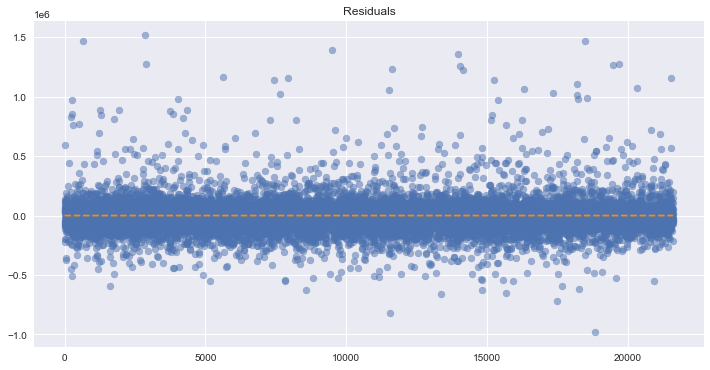

In [656]:
#Looking for train data homoscedasticity.
visualize_homoscedasticity(lin, X_train_all, y_train)

In [657]:
X_train_all.drop(['index', 'level_0'], axis=1, inplace=True)

KeyError: "['level_0'] not found in axis"

# Modeling

## Model 1

In [658]:
y_train = list(y_train)
X_train_all = sm.add_constant(X_train_all)

In [659]:
model = sm.OLS(y_train,X_train_all).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     755.7
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        07:56:21   Log-Likelihood:            -2.0995e+05
No. Observations:               15948   AIC:                         4.201e+05
Df Residuals:                   15841   BIC:                         4.209e+05
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.393e+05   1.75e+04     13.663      0.000    2.05e+05    2.74e+05
index                   0.2777      0.166      1.670      0.095      -0.048       0.604
sqft_living           133.9584      2.708     49.475      0.000     128.651     139.266
sqft_lot                0.5797      0.083      6.968      0.000       0.417       0.743
sqft_living15          25.5960      2.838      9.020      0.000      20.034      31.158
sqft_lot15             -0.2106      0.206     -1.023      0.306      -0.614       0.193
waterfront_1         4.511e+05   1.67e+04     26.976      0.000    4.18e+05    4.84e+05
bedrooms_2           1.875e+04   1.12e+04      1.678      0.093   -3154.313    4.07e+04
bedrooms_3           3.213e+04   1.12e+04      2.876      0.004    1.02e+04     5.4e+04
bedrooms_4           2.058e+04   1.14e+04      1.801      0.072   -1822.692     4.3e+04
bedrooms_5           1.141e+04   1.21e+04      0.945      0.345   -1.23e+04    3.51e+04
bedrooms_6          -1.858e+04   1.52e+04     -1.226      0.220   -4.83e+04    1.11e+04
bedrooms_7           7017.7075   3.22e+04      0.218      0.827    -5.6e+04    7.01e+04
bedrooms_8          -1.516e+04   4.95e+04     -0.307      0.759   -1.12e+05    8.18e+04
bedrooms_9          -4.624e+04   9.08e+04     -0.509      0.611   -2.24e+05    1.32e+05
grade_11 Excellent   1.901e+05   1.03e+04     18.431      0.000     1.7e+05     2.1e+05
grade_12 Luxury      4.473e+05   2.44e+04     18.354      0.000       4e+05    4.95e+05
grade_13 Mansion     9.317e+05      9e+04     10.352      0.000    7.55e+05    1.11e+06
grade_3 Poor        -6.903e+04   1.28e+05     -0.540      0.589    -3.2e+05    1.81e+05
grade_4 Low         -2.225e+05   2.85e+04     -7.796      0.000   -2.79e+05   -1.67e+05
grade_5 Fair        -2.502e+05   1.22e+04    -20.494      0.000   -2.74e+05   -2.26e+05
grade_6 Low Average -2.553e+05   7872.983    -32.428      0.000   -2.71e+05    -2.4e+05
grade_7 Average     -2.462e+05   6641.986    -37.069      0.000   -2.59e+05   -2.33e+05
grade_8 Good        -2.117e+05   5944.588    -35.618      0.000   -2.23e+05      -2e+05
grade_9 Better      -1.239e+05   5719.545    -21.670      0.000   -1.35e+05   -1.13e+05
renovated_1          7.808e+04   5613.065     13.910      0.000    6.71e+04    8.91e+04
view_EXCELLENT       2.618e+05   1.22e+04     21.497      0.000    2.38e+05    2.86e+05
view_FAIR            7566.1424   9622.880      0.786      0.432   -1.13e+04    2.64e+04
view_GOOD             8.84e+04   8577.294     10.306      0.000    7.16e+04    1.05e+05
view_NONE           -7.415e+04   5256.213    -14.108      0.000   -8.45e+04   -6.39e+04
zipcode_98002        1.422e+04   1.28e+04      1.112      0.266   -1.08e+04    3.93e+04
zipcode_98003       -1219.3457   1.15e+04     -0.106      0.915   -2.37e+04    2.13e+04
zip

## Model 2

In [660]:
#Removing features with a pvalue < 0.05.
columns = model.pvalues[model.pvalues <= 0.05]
columns.index
model = sm.OLS(y_train, X_train_all[columns.index]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     951.8
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        07:56:23   Log-Likelihood:            -2.0997e+05
No. Observations:               15948   AIC:                         4.201e+05
Df Residuals:                   15863   BIC:                         4.208e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.691e+05   1.15e+04     23.372      0.000    2.47e+05    2.92e+05
sqft_living           132.1018      2.403     54.980      0.000     127.392     136.811
sqft_lot                0.4940      0.070      7.025      0.000       0.356       0.632
sqft_living15          26.0121      2.798      9.298      0.000      20.528      31.496
waterfront_1         4.471e+05   1.66e+04     26.973      0.000    4.15e+05     4.8e+05
bedrooms_3           1.383e+04   2146.373      6.443      0.000    9622.036     1.8e+04
grade_11 Excellent   1.918e+05   1.03e+04     18.618      0.000    1.72e+05    2.12e+05
grade_12 Luxury      4.492e+05   2.43e+04     18.455      0.000    4.02e+05    4.97e+05
grade_13 Mansion      9.34e+05      9e+04     10.374      0.000    7.58e+05    1.11e+06
grade_4 Low         -2.322e+05   2.83e+04     -8.211      0.000   -2.88e+05   -1.77e+05
grade_5 Fair        -2.567e+05   1.21e+04    -21.246      0.000    -2.8e+05   -2.33e+05
grade_6 Low Average -2.585e+05   7792.037    -33.173      0.000   -2.74e+05   -2.43e+05
grade_7 Average      -2.48e+05   6524.443    -38.015      0.000   -2.61e+05   -2.35e+05
grade_8 Good        -2.131e+05   5865.454    -36.334      0.000   -2.25e+05   -2.02e+05
grade_9 Better      -1.242e+05   5689.678    -21.835      0.000   -1.35e+05   -1.13e+05
renovated_1          7.751e+04   5604.099     13.831      0.000    6.65e+04    8.85e+04
view_EXCELLENT         2.6e+05   1.19e+04     21.809      0.000    2.37e+05    2.83e+05
view_GOOD             8.52e+04   8180.491     10.415      0.000    6.92e+04    1.01e+05
view_NONE            -7.52e+04   4598.588    -16.354      0.000   -8.42e+04   -6.62e+04
zipcode_98004        7.109e+05   9127.653     77.889      0.000    6.93e+05    7.29e+05
zipcode_98005        3.096e+05   1.18e+04     26.336      0.000    2.87e+05    3.33e+05
zipcode_98006        2.498e+05   7359.432     33.938      0.000    2.35e+05    2.64e+05
zipcode_98007        2.444e+05   1.23e+04     19.801      0.000     2.2e+05    2.69e+05
zipcode_98008         2.49e+05   8916.923     27.921      0.000    2.31e+05    2.66e+05
zipcode_98010        7.838e+04   1.71e+04      4.594      0.000    4.49e+04    1.12e+05
zipcode_98011        1.332e+05   1.05e+04     12.687      0.000    1.13e+05    1.54e+05
zipcode_98014        1.046e+05   1.58e+04      6.617      0.000    7.36e+04    1.36e+05
zipcode_98019        8.961e+04   1.14e+04      7.827      0.000    6.72e+04    1.12e+05
zipcode_98023       -3.037e+04   7014.727     -4.329      0.000   -4.41e+04   -1.66e+04
zipcode_98024         1.36e+05   2.14e+04      6.363      0.000    9.41e+04    1.78e+05
zipcode_98027        1.725e+05   8634.636     19.980      0.000    1.56e+05    1.89e+05
zipcode_98028        1.317e+05   9010.897     14.614      0.000    1.14e+05    1.49e+05
zip

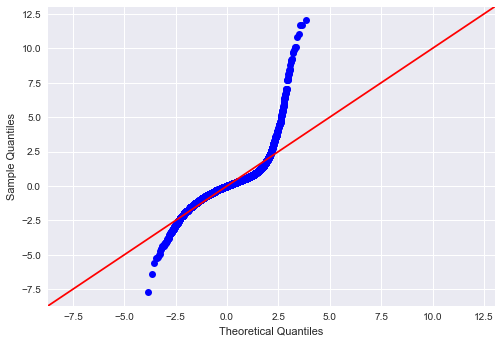

In [661]:
#checking normality
sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True);

Not quite the model we want, we'll try logging the values.

## Model 3 (Abandon)

In [662]:
#y_train = np.log(y_train)
#y_test = np.log(y_test)

In [663]:
#model= sm.OLS(y_train, X_train_all).fit()
#model.summary()

## Model 4 (Final Model)

In [664]:
columns = model.pvalues[model.pvalues <= 0.05]
columns.index
model = sm.OLS(y_train, X_train_all[columns.index]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     951.8
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        07:56:26   Log-Likelihood:            -2.0997e+05
No. Observations:               15948   AIC:                         4.201e+05
Df Residuals:                   15863   BIC:                         4.208e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.691e+05   1.15e+04     23.372      0.000    2.47e+05    2.92e+05
sqft_living           132.1018      2.403     54.980      0.000     127.392     136.811
sqft_lot                0.4940      0.070      7.025      0.000       0.356       0.632
sqft_living15          26.0121      2.798      9.298      0.000      20.528      31.496
waterfront_1         4.471e+05   1.66e+04     26.973      0.000    4.15e+05     4.8e+05
bedrooms_3           1.383e+04   2146.373      6.443      0.000    9622.036     1.8e+04
grade_11 Excellent   1.918e+05   1.03e+04     18.618      0.000    1.72e+05    2.12e+05
grade_12 Luxury      4.492e+05   2.43e+04     18.455      0.000    4.02e+05    4.97e+05
grade_13 Mansion      9.34e+05      9e+04     10.374      0.000    7.58e+05    1.11e+06
grade_4 Low         -2.322e+05   2.83e+04     -8.211      0.000   -2.88e+05   -1.77e+05
grade_5 Fair        -2.567e+05   1.21e+04    -21.246      0.000    -2.8e+05   -2.33e+05
grade_6 Low Average -2.585e+05   7792.037    -33.173      0.000   -2.74e+05   -2.43e+05
grade_7 Average      -2.48e+05   6524.443    -38.015      0.000   -2.61e+05   -2.35e+05
grade_8 Good        -2.131e+05   5865.454    -36.334      0.000   -2.25e+05   -2.02e+05
grade_9 Better      -1.242e+05   5689.678    -21.835      0.000   -1.35e+05   -1.13e+05
renovated_1          7.751e+04   5604.099     13.831      0.000    6.65e+04    8.85e+04
view_EXCELLENT         2.6e+05   1.19e+04     21.809      0.000    2.37e+05    2.83e+05
view_GOOD             8.52e+04   8180.491     10.415      0.000    6.92e+04    1.01e+05
view_NONE            -7.52e+04   4598.588    -16.354      0.000   -8.42e+04   -6.62e+04
zipcode_98004        7.109e+05   9127.653     77.889      0.000    6.93e+05    7.29e+05
zipcode_98005        3.096e+05   1.18e+04     26.336      0.000    2.87e+05    3.33e+05
zipcode_98006        2.498e+05   7359.432     33.938      0.000    2.35e+05    2.64e+05
zipcode_98007        2.444e+05   1.23e+04     19.801      0.000     2.2e+05    2.69e+05
zipcode_98008         2.49e+05   8916.923     27.921      0.000    2.31e+05    2.66e+05
zipcode_98010        7.838e+04   1.71e+04      4.594      0.000    4.49e+04    1.12e+05
zipcode_98011        1.332e+05   1.05e+04     12.687      0.000    1.13e+05    1.54e+05
zipcode_98014        1.046e+05   1.58e+04      6.617      0.000    7.36e+04    1.36e+05
zipcode_98019        8.961e+04   1.14e+04      7.827      0.000    6.72e+04    1.12e+05
zipcode_98023       -3.037e+04   7014.727     -4.329      0.000   -4.41e+04   -1.66e+04
zipcode_98024         1.36e+05   2.14e+04      6.363      0.000    9.41e+04    1.78e+05
zipcode_98027        1.725e+05   8634.636     19.980      0.000    1.56e+05    1.89e+05
zipcode_98028        1.317e+05   9010.897     14.614      0.000    1.14e+05    1.49e+05
zip

# Assumptions

## Normality

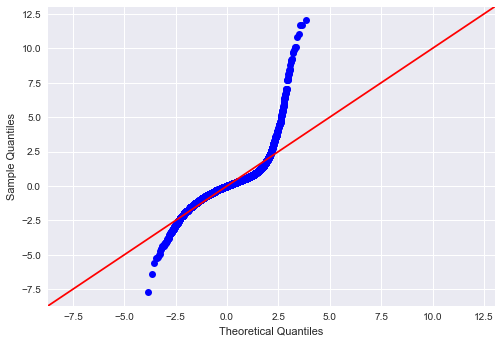

In [665]:
sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True);

## Homoscedasticity

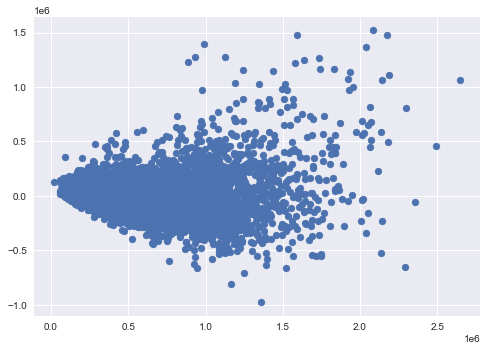

In [666]:
plt.scatter(model.predict(X_train_all[columns.index]), model.resid)

## Linearity

<AxesSubplot:xlabel='sqft_living'>

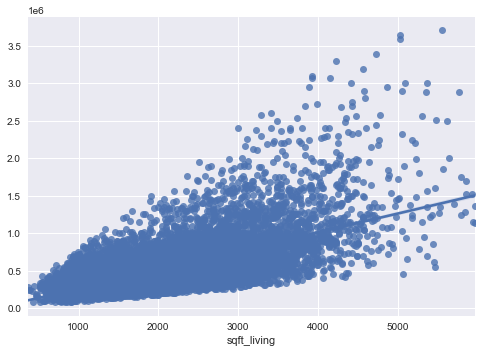

In [667]:
sns.regplot(X_train_all['sqft_living'],y_train)

## Overfitting

In [668]:
lin1 = LinearRegression()
lin1.fit(X_train_all, y_train)

LinearRegression()

In [669]:
y_pred = lin1.predict(X_train_all)

In [670]:
y_pred

array([ 463749.7521583 ,  494722.0127441 , 1257783.87476581, ...,
        237435.67196685,  366339.46625947,  122770.57910937])

In [671]:
train_mae = metrics.mean_absolute_error(y_train, y_pred)
train_mse = metrics.mean_squared_error(y_train, y_pred)
train_rmse = np.sqrt(train_mse) # or mse**(0.5)  
train_r2 = metrics.r2_score(y_train,y_pred)

print("Results of training data:")
print("MAE:",train_mae)
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R-Squared:", train_r2)

Results of training data:
MAE: 79408.51761655793
MSE: 15924558130.903818
RMSE: 126192.54387999244
R-Squared: 0.8348908032231896


In [672]:
lin2 = LinearRegression()
lin2.fit(X_test_all,y_test)

LinearRegression()

In [673]:
y_test_pred = lin2.predict(X_test_all)
y_test_pred

array([245854.43318762, 178264.4264184 , 527829.70528863, ...,
       620004.66945782, 418031.36031481, 427543.05869158])

In [674]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse) # or mse**(0.5)  
test_r2 = metrics.r2_score(y_test,y_test_pred)

print("Results of tests data:")
print("MAE:",test_mae)
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R-Squared:", test_r2)

Results of tests data:
MAE: 80433.84930959113
MSE: 16234525170.657793
RMSE: 127414.77610802364
R-Squared: 0.8390012546391499


There is no overfitting per the results

# Conclusion

## Graphs for Presentation

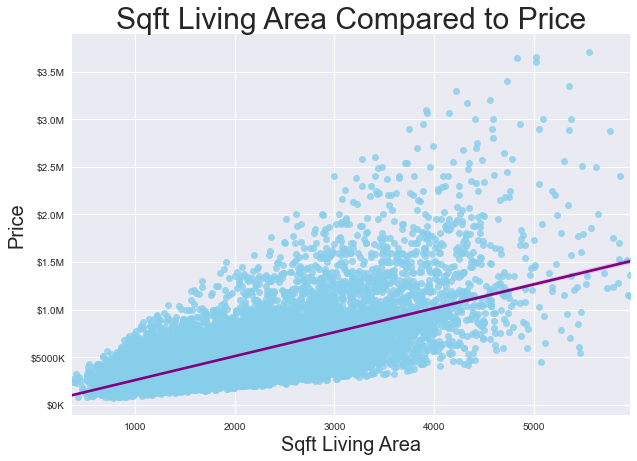

In [675]:
fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(data=df, x='sqft_living', y='price', ax=ax, color='skyblue', line_kws={'color': 'purple'})
ax.set_title('Sqft Living Area Compared to Price', fontsize=30)
ax.set_xlabel('Sqft Living Area', fontsize=20)
ax.set_ylabel('Price', fontsize=20)
ax.yaxis.set_major_formatter(currency);

In [676]:
df['grade'] = df['grade'].str.split(" ", n = 1, expand = True)
df['grade'] = df['grade'].astype(object).astype(int)

In [677]:
df['grade'] = df['grade'].sort_values(axis=0, ascending=False)

In [678]:
df['grade']

0        7
1        7
2        6
3        7
4        8
        ..
21591    8
21593    8
21594    7
21595    8
21596    7
Name: grade, Length: 19936, dtype: int32

Text(0, 0.5, 'Sqft Living Area')

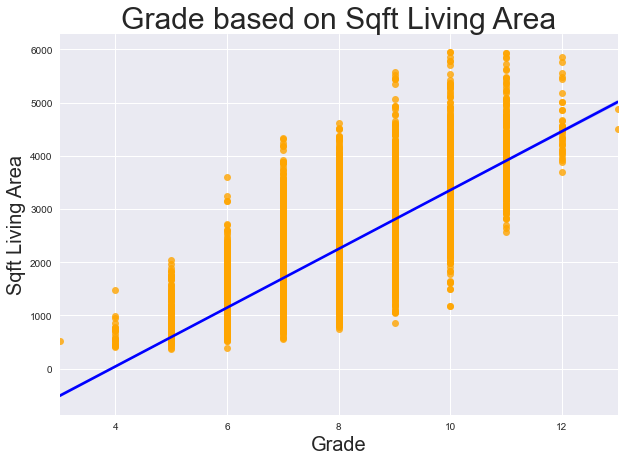

In [679]:
fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(data=df, x='grade', y='sqft_living', ax=ax, color='orange', line_kws={'color': 'blue'})
ax.set_title('Grade based on Sqft Living Area', fontsize=30)
ax.set_xlabel('Grade', fontsize=20)
ax.set_ylabel('Sqft Living Area', fontsize=20)

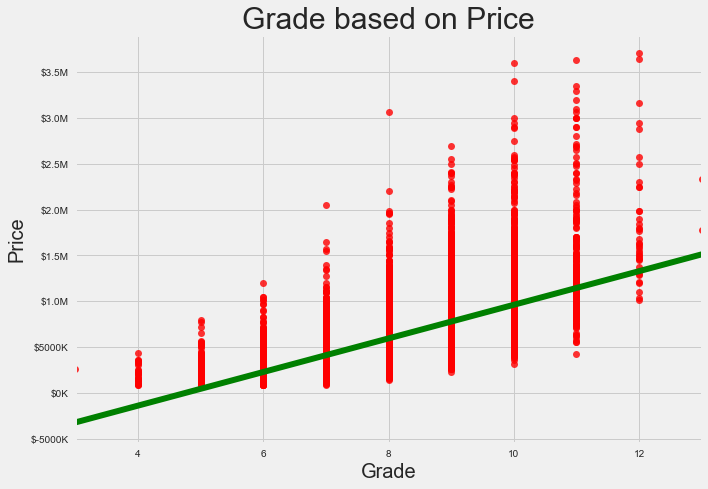

In [680]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(10,7))
    sns.regplot(data=df, x='grade', y='price', ax=ax, color='red', line_kws={'color': 'green'})
    ax.set_title('Grade based on Price', fontsize=30)
    ax.set_xlabel('Grade', fontsize=20)
    ax.set_ylabel('Price', fontsize=20)
    ax.yaxis.set_major_formatter(currency)

## Interpretations

**Top Features:**
* Zipcode 98039
* Square foot living
* Grade
* Condition
* View



**Interpretations**
* The top coefficients for Zipcodes 98039 is 1,108,000 meaning that price of a house in that location will be worth 1.1 million USD more than the other houses in KC.
* The coefficient for sqft_living is 132 meaning that the price per square foot is 132 USD
* The coefficient for the highest grade is 934,000 meaning that the price of a mansion grade house will be worth 934,000 USD more than other houses with lower grades (i.e. luxury, etc.)
* The coefficient for the top condition is 77,660  meaning if the house is in very good condition, the price will increase by 77,660 USD
* The coefficient for the top view is 260,000 meaning if the view is considered excellent, the price will increase by 260,000 USD

## Recommendations

**Recommendations:**
* If you are selling your house or increase the value of it, try and increase the square footage of the house (whether it's adding an addition to the property)
* Target homes in specific areas (such as Zipcode 98039) to buy and resell since it has proven to be the biggest factor effecting price
* If you are selling, improve the quality of your house by investing in upgrades. Grade has proven to be a huge factor correlating with the price

## Future Work

* Look at location (lat/long) to see how much of a factor it plays into the price of a house.
* Gather data from different school districts in KC to see if there is a relationship with prices of a house and the quality of schools.
* Get before/after stats on renovated houses to see the frequency houses are being renovated and if it has an effect on prices